In [7]:
! cat ../logs/dilated-10-128_bs\=10,corrupt\=0.5,len\=64,lr\=0.0625,mm\=orderless,nreg_conv\=2,num_i\=4,n_pch\=128,mask_only\=False,quant\=0.125,rescale\=True,depth_mul\=1,sep\=True,res\=True,sconv\=True,soft\=True/logs.txt

Execution output from Oct 2, 2020 10:06 AM
	Stream
		+ set -e
		+ logdir=./logs
		+ data_dir=./data/
		+ dataset=stringquartet16thseparated
		+ crop_piece_len=64
		+ separate_instruments=True
		+ quantization_level=0.125
		+ maskout_method=orderless
		+ num_layers=64
		+ num_filters=128
		+ batch_size=10
		+ use_sep_conv=True
		+ architecture=dilated
		+ num_dilation_blocks=1
		+ dilate_time_only=False
		+ repeat_last_dilation_level=False
		+ num_pointwise_splits=2
		+ interleave_split_every_n_layers=2
		+ num_epochs=30
		+ python coconet_train.py --num_epochs=30 --logdir=./logs --log_process=True --data_dir=./data/ --dataset=stringquartet16thseparated --crop_piece_len=64 --separate_instruments=True --quantization_level=0.125 --maskout_method=orderless --num_layers=64 --num_filters=128 --use_residual --batch_size=10 --use_sep_conv=True --architecture=dilated --num_dilation_blocks=1 --dilate_time_only=False --repeat_last_dilation_level=False --num_pointwise_splits=2 --interleave_split_e

In [14]:
lines = []
with open('../logs/dilated-10-128_bs=10,corrupt=0.5,len=64,lr=0.0625,mm=orderless,nreg_conv=2,num_i=4,n_pch=128,mask_only=False,quant=0.125,rescale=True,depth_mul=1,sep=True,res=True,sconv=True,soft=True/logs.txt', 'r') as f:
    for line in f:
        if line.strip().startswith('I1002') and 'train,' in line:
            lines.append(line.strip())

print(lines)

['I1002 03:29:22.666181 139861987436416 coconet_train.py:224] train, epoch 0: loss (mask): 5.8304, loss (unmask): 10.3977, loss (total): 8.1110, log lr: -2.7726, time taken: 1289.0252', 'I1002 04:14:08.909491 139861987436416 coconet_train.py:224] train, epoch 1: loss (mask): 4.2854, loss (unmask): 4.1698, loss (total): 4.2283, log lr: -2.7726, time taken: 1256.4708', 'I1002 04:35:28.659699 139861987436416 coconet_train.py:224] train, epoch 2: loss (mask): 4.2659, loss (unmask): 3.4358, loss (total): 3.8406, log lr: -2.7726, time taken: 1257.4583', 'I1002 04:57:02.752522 139861987436416 coconet_train.py:224] train, epoch 3: loss (mask): 5.0437, loss (unmask): 8.5128, loss (total): 6.7667, log lr: -2.7726, time taken: 1272.3747', 'I1002 05:19:09.906578 139861987436416 coconet_train.py:224] train, epoch 4: loss (mask): 5.2607, loss (unmask): 8.9380, loss (total): 7.1025, log lr: -2.7726, time taken: 1295.2838', 'I1002 05:40:32.483269 139861987436416 coconet_train.py:224] train, epoch 5: l

In [18]:
lines = [line.split('train, ')[1] for line in lines]
lines

['epoch 0: loss (mask): 5.8304, loss (unmask): 10.3977, loss (total): 8.1110, log lr: -2.7726, time taken: 1289.0252',
 'epoch 1: loss (mask): 4.2854, loss (unmask): 4.1698, loss (total): 4.2283, log lr: -2.7726, time taken: 1256.4708',
 'epoch 2: loss (mask): 4.2659, loss (unmask): 3.4358, loss (total): 3.8406, log lr: -2.7726, time taken: 1257.4583',
 'epoch 3: loss (mask): 5.0437, loss (unmask): 8.5128, loss (total): 6.7667, log lr: -2.7726, time taken: 1272.3747',
 'epoch 4: loss (mask): 5.2607, loss (unmask): 8.9380, loss (total): 7.1025, log lr: -2.7726, time taken: 1295.2838',
 'epoch 5: loss (mask): 4.8560, loss (unmask): 5.8943, loss (total): 5.3828, log lr: -2.7726, time taken: 1258.9282',
 'epoch 6: loss (mask): 4.8948, loss (unmask): 5.9916, loss (total): 5.4320, log lr: -2.7726, time taken: 1259.1195',
 'epoch 7: loss (mask): 4.8270, loss (unmask): 6.3402, loss (total): 5.5788, log lr: -2.7726, time taken: 1274.6512',
 'epoch 8: loss (mask): 5.9115, loss (unmask): 15.5071,

In [19]:
import pandas as pd

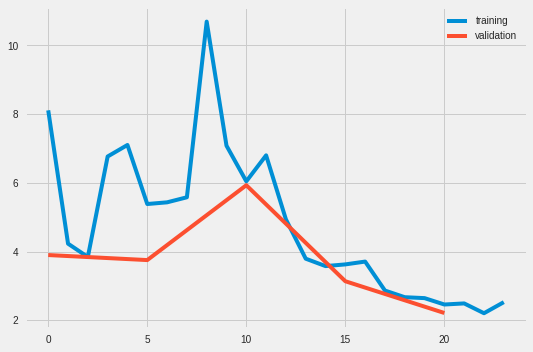

In [142]:
import pandas as pd


def get_train_loss(file):
    lines = []

    with open(file, 'r') as f:
        for line in f:
            if line.strip().startswith('I1') and 'train,' in line:
                lines.append(line.strip())

    lines = [line.split('train, ')[1] for line in lines]
    df = pd.DataFrame([line.split(':', 1) for line in lines])
    df = df.set_index(0)
    df = df[1].str.split(', ', expand=True)
    df = df.applymap(lambda x: x.split(': ')[1])
    df.columns = [f'temp{num}' for num in range(5)]
    df = df.reset_index()
    df.columns = ['epoch_num', 'loss (mask)', 'loss (unmask)', 'loss (total)', 'log lr', 'time taken(s)']
    df['epoch_num'] = df['epoch_num'].apply(lambda x: x.split(' ')[1])
    df = df.applymap(float)
    df['epoch_num'] = df['epoch_num'].apply(int)
    
    return df

def get_valid_loss(file):
    lines = []

    with open(file, 'r') as f:
        for line in f:
            if line.strip().startswith('I1') and 'valid,' in line:
                lines.append(line.strip())

    lines = [line.split('valid, ')[1] for line in lines]
    df = pd.DataFrame([line.split(':', 1) for line in lines])
    df = df.set_index(0)
    df = df[1].str.split(', ', expand=True)
    df = df.applymap(lambda x: x.split(': ')[1])
    df.columns = [f'temp{num}' for num in range(5)]
    df = df.reset_index()
    df.columns = ['epoch_num', 'loss (mask)', 'loss (unmask)', 'loss (total)', 'log lr', 'time taken(s)']
    df['epoch_num'] = df['epoch_num'].apply(lambda x: x.split(' ')[1])
    df = df.applymap(float)
    df['epoch_num'] = df['epoch_num'].apply(int)
    
    return df

df = get_train_loss('../logs/dilated-10-128_bs=10,corrupt=0.5,len=64,lr=0.0625,mm=orderless,nreg_conv=2,num_i=4,n_pch=128,mask_only=False,quant=0.125,rescale=True,depth_mul=1,sep=True,res=True,sconv=True,soft=True/logs.txt')
df_valid = get_valid_loss('../logs/dilated-10-128_bs=10,corrupt=0.5,len=64,lr=0.0625,mm=orderless,nreg_conv=2,num_i=4,n_pch=128,mask_only=False,quant=0.125,rescale=True,depth_mul=1,sep=True,res=True,sconv=True,soft=True/logs.txt')

fig, ax = plt.subplots()
ax.plot(df['epoch_num'], df['loss (total)'], label='training')
ax.plot(df_valid['epoch_num'], df_valid['loss (total)'], label='validation')
ax.legend()

plt.savefig('temp.png') #random_normal initializers, lr=0.0625, no data correction

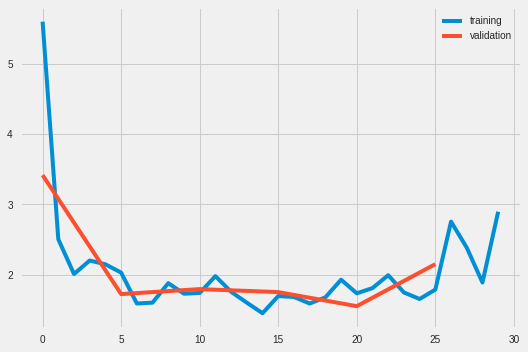

In [143]:
df2 = get_train_loss('../logs/dilated-9-128_bs=10,corrupt=0.5,len=64,lr=0.0625,mm=orderless,nreg_conv=2,num_i=4,n_pch=46,mask_only=False,quant=0.125,rescale=True,depth_mul=1,sep=True,res=True,sconv=True,soft=True/logs.txt')
df2_valid = get_valid_loss('../logs/dilated-9-128_bs=10,corrupt=0.5,len=64,lr=0.0625,mm=orderless,nreg_conv=2,num_i=4,n_pch=46,mask_only=False,quant=0.125,rescale=True,depth_mul=1,sep=True,res=True,sconv=True,soft=True/logs.txt')

fig, ax = plt.subplots()
ax.plot(df2['epoch_num'], df2['loss (total)'], label='training')
ax.plot(df2_valid['epoch_num'], df2_valid['loss (total)'], label='validation')
ax.legend()

plt.savefig('temp.png') #random_normal initializers, lr=0.0625 post-data-correction

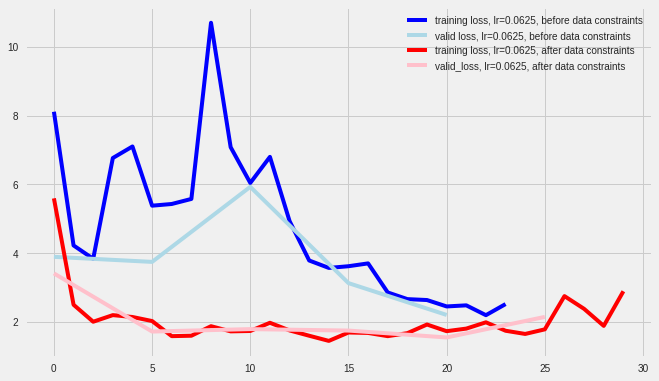

In [144]:
import matplotlib as mpl
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['epoch_num'], df['loss (total)'], label='training loss, lr=0.0625, before data constraints', c='blue')
ax.plot(df_valid['epoch_num'], df_valid['loss (total)'], label='valid loss, lr=0.0625, before data constraints', c='lightblue')
ax.plot(df2['epoch_num'], df2['loss (total)'], label='training loss, lr=0.0625, after data constraints', c='red')
ax.plot(df2_valid['epoch_num'], df2_valid['loss (total)'], label='valid_loss, lr=0.0625, after data constraints', c='pink')
ax.legend()

plt.savefig('temp.png') 

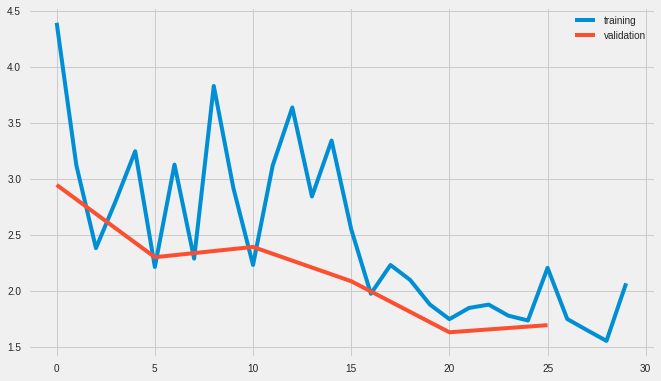

In [169]:
df3 = get_train_loss('../logs/lr=0.125,mm=orderless,nreg_conv=2,num_i=4,n_pch=46,mask_only=False,quant=0.125,rescale=True,depth_mul=1,sep=True,res=True,sconv=True,soft=True/logs.txt')
df3_valid = get_valid_loss('../logs/lr=0.125,mm=orderless,nreg_conv=2,num_i=4,n_pch=46,mask_only=False,quant=0.125,rescale=True,depth_mul=1,sep=True,res=True,sconv=True,soft=True/logs.txt')


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df3['epoch_num'], df3['loss (total)'], label='training')
ax.plot(df3_valid['epoch_num'], df3_valid['loss (total)'], label='validation')
ax.legend()
# plt.show()
plt.savefig('temp.png') #random_normal initializers, lr=0.125

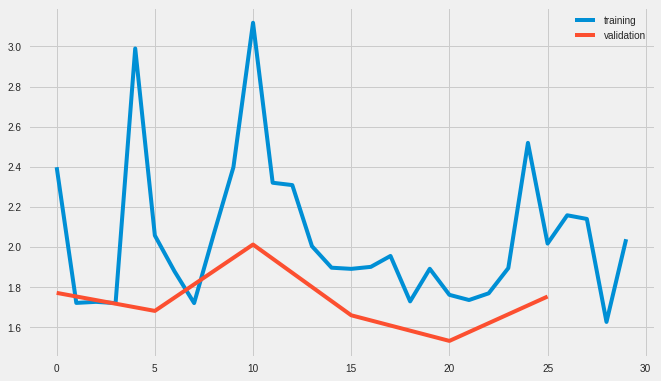

In [171]:
df4 = get_train_loss('../logs/glorot_uniform_lr=0.0625/logs.txt')
df4_valid = get_valid_loss('../logs/glorot_uniform_lr=0.0625/logs.txt')


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df4['epoch_num'], df4['loss (total)'], label='training')
ax.plot(df4_valid['epoch_num'], df4_valid['loss (total)'], label='validation')
ax.legend()
# plt.show() #glorot_uniform initializers, lr=0.0625
plt.savefig('temp.png') #might need to try lower learning rate

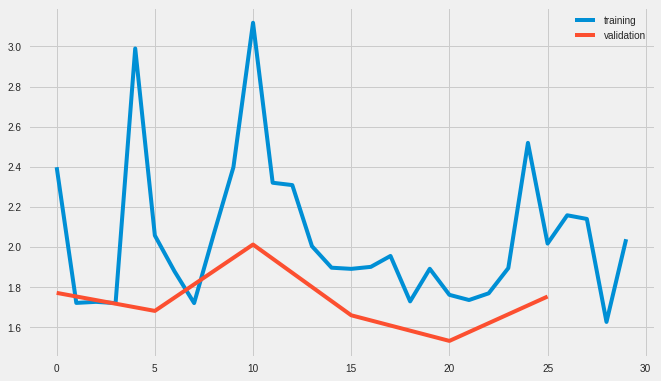

In [172]:
df5 = get_train_loss('../logs/glorot_uniform_lr=0.0625/logs.txt')
df5_valid = get_valid_loss('../logs/glorot_uniform_lr=0.0625/logs.txt')


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df5['epoch_num'], df4['loss (total)'], label='training')
ax.plot(df5_valid['epoch_num'], df5_valid['loss (total)'], label='validation')
ax.legend()
# plt.show() 
plt.savefig('temp.png') #lecum unifor lr=0.0625

In [168]:
sorted(mpl.style.available)
mpl.style.use('fivethirtyeight')